In [11]:
import pandas as pd
from numpy import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

In [12]:
df=pd.read_csv('insurance.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'insurance.csv'

In [ ]:
df.head(5)

In [6]:
# While in excel,I already encoded sex,smoker and region to New_sex,New_smoker and New_Region respectively 
# so that computer  can understand for machine learning task in regression

In [7]:
# So drop uneccessary columns
df=df.drop(['sex','smoker','region'],axis=1)

In [8]:
df.shape

(1338, 7)

In [9]:
df

,age,New_Sex,bmi,children,New_Smoker,New_Region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


### Data Exploration

### Find correlation between variables


In [10]:
df.corr()

,age,New_Sex,bmi,children,New_Smoker,New_Region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
New_Sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
New_Smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
New_Region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


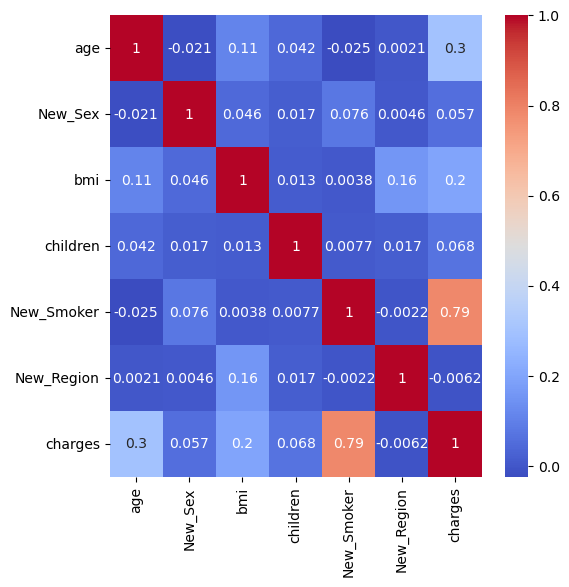

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [12]:
y=df.iloc[:,6]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [13]:
X=df.iloc[:,0:6]
X

,age,New_Sex,bmi,children,New_Smoker,New_Region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


### First model

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Now lets normalize the datasets so as to enable all features have equal chance of contribution
# So scale X_train and X_test
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [268]:
X_train

array([[ 1.54446486, -1.02597835,  0.10318223, -0.91501097, -0.51298918,
        -0.42907066],
       [ 0.48187425,  0.97467943, -0.4908445 , -0.91501097, -0.51298918,
         1.36784271],
       [ 1.04858924, -1.02597835,  0.2266597 ,  1.56027883, -0.51298918,
         0.46938603],
       ...,
       [ 1.33194673,  0.97467943, -0.8954835 , -0.91501097, -0.51298918,
        -1.32752735],
       [-0.15568012, -1.02597835,  2.84638435,  0.73518223,  1.94935887,
         1.36784271],
       [ 1.11942861,  0.97467943, -0.10706319, -0.91501097, -0.51298918,
         1.36784271]])

In [269]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(936, 6) (936,)
(402, 6) (402,)


In [270]:
model = LinearRegression()  # define the linear regression model
model.fit(X_train, y_train)  # fit the data

LinearRegression()

In [271]:
print('The weight vector is:', model.coef_)
print()
print('The bias is:', model.intercept_)

The weight vector is: [3693.22419232   54.80557279 2064.85587799  514.32785602 9592.79601818
 -363.35933577]

The bias is: 13379.157306773504


In [272]:
y_pred = model.predict(X_test) # make predictions for the test data
print(y_pred)  # it returns us a `np.ndarray` object
print(y_pred.shape)

[ 9.17802505e+03  7.16305826e+03  3.77321932e+04  9.83623445e+03
  2.75099058e+04  1.07080009e+04  1.86393349e+02  1.73012249e+04
  1.21139960e+03  1.15968890e+04  2.86059370e+04  9.65551478e+03
  5.25566409e+03  3.90657608e+04  4.10260085e+04  3.77848973e+04
  1.52884276e+04  3.64876258e+04  9.27714747e+03  3.21429418e+04
  3.83654322e+03  1.01710828e+04  2.19877622e+03  6.97056930e+03
  1.15671685e+04  1.31596444e+04  1.45370625e+04  6.19052885e+03
  1.01759106e+04  2.18439855e+03  9.05060452e+03  1.33420390e+04
  4.41860310e+03  3.57477033e+03  4.36407552e+03  1.32017754e+04
  1.74746466e+03  8.74639049e+03  3.40711254e+04  3.32023583e+04
  3.66555274e+03  4.41397674e+03  1.41340507e+04  1.19044216e+04
  8.87542656e+03  1.23303850e+04  5.21600171e+03  2.99177914e+03
  3.61828234e+04  9.20565746e+03  1.60643152e+04  2.36572770e+03
  1.23851880e+04  1.54606678e+03  1.36999103e+04  1.28842468e+04
  4.52265595e+03  3.28094723e+04  1.33513131e+04  1.30797199e+04
  1.42573513e+04  1.03752

In [273]:
# Compute mse
math.sqrt(mean_squared_error(y_test,y_pred))

5815.818415654073

In [274]:
r2_score(y_test,y_pred)

0.7693169411699159

### Second model

In [275]:
df.corr()

,age,New_Sex,bmi,children,New_Smoker,New_Region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
New_Sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
New_Smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
New_Region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


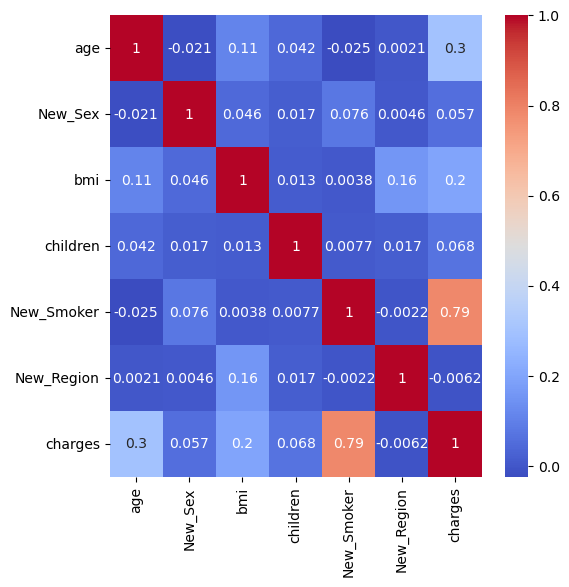

In [276]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

So from above we can observe that there is a strong linear correlation between the charges(target) and New_smoker

In [277]:
y=df.iloc[:,6]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [278]:
X=df.iloc[:,4]
X

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: New_Smoker, Length: 1338, dtype: int64

### Lets reshape X and y 


We have to reshape X and y because they are both single arrays

In [279]:
X=X.values.reshape(-1,1)
y=y.values.reshape(-1,1)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [281]:
# Now lets normalize the datasets so as to enable all features have equal chance of contribution
# So scale X_train and X_test
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [282]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(936, 1) (936, 1)
(402, 1) (402, 1)


In [283]:
model = LinearRegression()  # define the linear regression model
model.fit(X_train, y_train)  # fit the data

LinearRegression()

In [284]:
print('The weight vector is:', model.coef_)
print()
print('The bias is:', model.intercept_)

The weight vector is: [[9427.649439]]

The bias is: [13379.15730677]


In [285]:
y_pred = model.predict(X_test) # make predictions for the test data
print(y_pred)  # it returns us a `np.ndarray` object
print(y_pred.shape)

[[ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [32442.15260323]
 [32442.15260323]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [32442.15260323]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69096492]
 [ 8716.69

In [286]:
# Compute mse
math.sqrt(mean_squared_error(y_test,y_pred))

7169.787786759297

In [287]:
r2_score(y_test,y_pred)

0.6494042655991139

---

### Third model

In [288]:
df.corr()

,age,New_Sex,bmi,children,New_Smoker,New_Region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
New_Sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
New_Smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
New_Region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


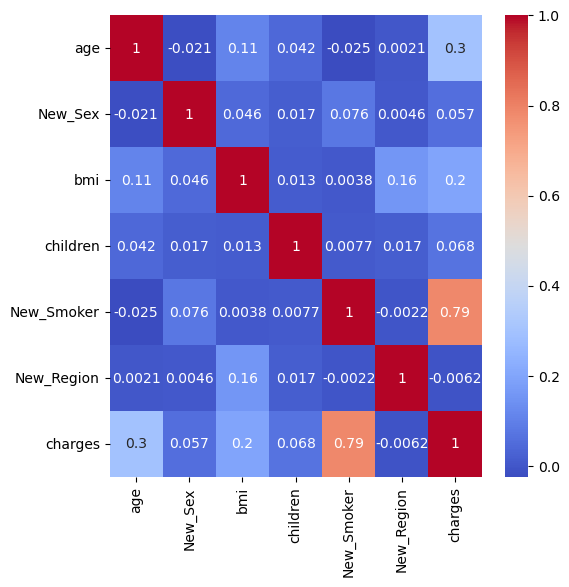

In [289]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

In [290]:
#y=df.iloc[:,6]
y=df.loc[:,'charges']
y


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [291]:
X=df.loc[:,['bmi','New_Smoker','age']]
X

,bmi,New_Smoker,age
0,27.900,1,19
1,33.770,0,18
2,33.000,0,28
3,22.705,0,33
4,28.880,0,32
...,...,...,...
1333,30.970,0,50
1334,31.920,0,18
1335,36.850,0,18
1336,25.800,0,21


In [292]:
# #Merge and X and y
# df = pd.concat([X, y], axis=1)
# # Next save as a csv
# df.to_csv('insurance_1.csv')

In [293]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [294]:
# Now lets normalize the datasets so as to enable all features have equal chance of contribution
# So scale X_train and X_test
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [295]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(936, 3) (936,)
(402, 3) (402,)


In [296]:
regressor = LinearRegression()  # define the linear regression model
regressor.fit(X_train, y_train)  # fit the data

LinearRegression()

In [297]:
print('The weight vector is:', regressor.coef_)
print()
print('The bias is:', regressor.intercept_)

The weight vector is: [1991.99477342 9608.93433161 3730.1994914 ]

The bias is: 13379.157306773504


In [298]:
y_pred = regressor.predict(X_test) # make predictions for the test data
print(y_pred)  # it returns us a `np.ndarray` object
print(y_pred.shape)

[ 8359.17529475  7466.90122966 38187.40235642  8807.65373885
 27677.51345746 10988.92456034   531.4603889  17479.12895765
  1303.96180898 10542.35016745 28264.29009299  8990.65758001
  5449.63269012 38223.08323935 41535.8325366  37417.10082246
 14951.87465118 36689.00921721  9534.16938824 32542.19334854
  2580.91702028 10161.83078706  3016.74277305  6787.57416698
 10631.51067648 13144.06032298 15519.73981644  5167.29858558
  9345.96166671  2665.973592    8315.24149273 13681.03030138
  4963.28626102  2680.00927725  4772.40264057 12970.422128
  2293.61704177  9310.81462509 34093.21696124 33281.2716003
  2449.39866507  4122.6328153  14665.09572995 12212.47745044
  8466.48821038 12855.46743949  4572.44920885  2706.99348872
 35405.70513801  8760.95394896 16704.42765147  2423.27639025
 12135.3584865   1400.48104002 14233.28382554 11889.12344919
  4416.71263003 31681.86936888 14351.71852111 13054.89981394
 15286.0673815   9982.98871172 16103.75046411  7492.83054255
 12037.501306    4028.78948

In [299]:
# Compute mse
math.sqrt(mean_squared_error(y_test,y_pred))

5866.387718262677

In [300]:
r2_score(y_test,y_pred)

0.76528786150634

In [301]:
df=pd.read_csv('insurance_1.csv')

In [302]:
df.head(4)

,bmi,New_Smoker,age,charges
0,27.900,1,19,16884.92400
1,33.770,0,18,1725.55230
2,33.000,0,28,4449.46200
3,22.705,0,33,21984.47061


## Fouth Model

In [6]:
#y=df.iloc[:,6]
y=df.loc[:,'charges']
y


NameError: name 'df' is not defined

In [7]:
X=df.loc[:,['bmi','New_Smoker','age']]
X

NameError: name 'df' is not defined

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

NameError: name 'X' is not defined

In [150]:
# Now lets normalize the datasets so as to enable all features have equal chance of contribution
# So scale X_train and X_test
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [151]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(936, 3) (936,)
(402, 3) (402,)


In [152]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=4,max_depth=3)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=4)

----

In [153]:
y_pred = rf.predict(X_test) # make predictions for the test data
print(y_pred)  # it returns us a `np.ndarray` object
print(y_pred.shape)

[12916.2341114  11312.9543506  44214.4912833  14971.87816365
 12191.5515254   6931.77840371  2991.08298949 12191.5515254
  6931.77840371  6931.77840371  6931.77840371 12191.5515254
  9094.51531143  6931.77840371 18800.11514516 12191.5515254
 14971.87816365  6931.77840371  6931.77840371 37996.61261193
 25478.84753482 12916.2341114  12916.2341114  25478.84753482
  5960.46654912  6931.77840371  6931.77840371  6931.77840371
  6931.77840371 11312.9543506   6931.77840371 46054.80917573
 14971.87816365 12916.2341114  18800.11514516  6931.77840371
 11312.9543506  40251.86507022 40251.86507022  2991.08298949
  6931.77840371  6931.77840371 20645.80773257 46054.80917573
 37996.61261193  2991.08298949 12191.5515254   7853.48732177
  6931.77840371 12916.2341114   5960.46654912  2991.08298949
 25478.84753482 46054.80917573 14971.87816365  6931.77840371
  6931.77840371 12191.5515254   9094.51531143 14971.87816365
  2991.08298949 46054.80917573 14971.87816365 12191.5515254
 11312.9543506  12191.551525

In [154]:
# Compute mse
math.sqrt(mean_squared_error(y_test,y_pred))

4536.1105393881735

In [155]:
r2_score(y_test,y_pred)

0.8709702900714748

In [160]:
# # Predict unseen data
# predictions = rf.predict(X) # make predictions for the test data
# print(y_pred)

---

## Fifth model

In [1]:
y=df.loc[:,'charges']
y


NameError: name 'df' is not defined

In [2]:
X=df.loc[:,['bmi','New_Smoker','age']]
X

NameError: name 'df' is not defined

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

NameError: name 'train_test_split' is not defined

In [24]:
# Now lets normalize the datasets so as to enable all features have equal chance of contribution
# So scale X_train and X_test
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.fit_transform(X_test)

In [25]:
from sklearn.linear_model import Ridge
import numpy as np
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [26]:
y_pred = clf.predict(X_test) # make predictions for the test data
print(y_pred)  # it returns us a `np.ndarray` object
print(y_pred.shape)

[11762.90319197 10184.55028176 37495.54956924 16929.24985618
  7279.33968035  4050.79341032  1641.86272024 13656.03501278
  8155.25253485  6647.04711534  3224.7966056   9862.83093584
  9337.12697879  4813.61381414 27882.79299366 10537.53990475
 11781.4110195   5852.95643446  7824.85381296 26837.14578479
 32784.74404413 14053.6472274  11997.66017858 32808.53000256
  5266.37422771  9085.61643254  1082.45238974  9641.4569183
  4795.07533213 10059.93642062  8142.49008531 40532.84302319
 16846.35524319 15006.01216115 24333.63047157  5298.79358037
 12987.14805809 30888.25695999 32722.77802782  4587.03830192
  4038.03096078  5044.33370891 30251.16883842 38819.4119535
 28465.3840903   4629.34741512 10422.76982241  7832.36878608
  3217.28163247 10889.34979764  5905.13998095  2461.47830019
 33125.59173712 37046.88755649 17383.12869086  7393.0679778
  6871.97565038  9928.91068022  7813.81497682 11781.4110195
  2729.27515898 37736.61114439 14838.46866728 11977.38275592
 12617.90277704 14739.395032

In [27]:
# Compute mse
math.sqrt(mean_squared_error(y_test,y_pred))

5829.095162568776

In [28]:
r2_score(y_test,y_pred)

0.7869287992473633

### Define pickle

In [29]:
#use the ridge regression model
pickle.dump(clf,open('model.pkl','wb'))

In [30]:
model=pickle.load(open('model.pkl','rb'))

In [31]:
# model.predict(X_test)

### Get the csv 

In [13]:
# Merge and X and y
df = pd.concat([X, y], axis=1)
# # Next save as a csv
df.to_csv('insurance_1.csv',index=False)

In [14]:
df=pd.read_csv('insurance_1.csv')

In [15]:
df.head(10)

,bmi,New_Smoker,age,charges
0,27.900,1,19,16884.92400
1,33.770,0,18,1725.55230
2,33.000,0,28,4449.46200
3,22.705,0,33,21984.47061
4,28.880,0,32,3866.85520
5,25.740,0,31,3756.62160
6,33.440,0,46,8240.58960
7,27.740,0,37,7281.50560
8,29.830,0,37,6406.41070
9,25.840,0,60,28923.13692


---

### Test the loaded model with a new data

In [157]:
# pickle.dump(rf,open('model.pkl','wb'))

In [158]:
# model=pickle.load(open('model.pkl','rb'))

In [37]:
result=model.predict([[33,0,28]])
print(result)

[181307.37633881]
